# Data wrangling Project 2
This file is used for exploring and refining the datasets.

Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from IPython.display import display
warnings.filterwarnings('ignore')

# Loading the datasets

Just with .txt files, without converting it to csv (works perfectly fine)

In [7]:
# Defining the file path 
file_path_client = 'Datasets/Datasets_raw/df_final_experiment_clients.txt'
file_path_fwd1 = 'Datasets/Datasets_raw/df_final_web_data_pt_1.txt'
file_path_fwd2 = 'Datasets/Datasets_raw/df_final_web_data_pt_2.txt'

# Defining the file path for the demo set
file_path_demo = 'Datasets/Datasets_raw/df_final_demo.txt'

# Loading the CSV files into DataFrames
df_client = pd.read_csv(file_path_client)
df_fwd1 = pd.read_csv(file_path_fwd1)
df_fwd2 = pd.read_csv(file_path_fwd2)

# Loading the demo file into Dataframe
df_demo = pd.read_csv(file_path_demo)

## Naming of the dataframes 
Here are all the information about the datasets that are merged together
- df_web = web data 1 and web data 2 merged together 
- df_web_ec = experiment clients data + web d1 + web df2
- df_merged = df start + df demo 

# Exploring the datasets

### Exploring the webdataset  part 1 

In [ ]:
# Here I am checking the columns of the dataframes if the first web data file
df_fwd1

In [ ]:
df_fwd1.info()
df_fwd1.head()

### Exploring the webdataset  part 2

In [10]:
# Here I am checking the columns and information of the second web data file
df_fwd2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [ ]:
df_fwd2.info()
df_fwd2.head()

### Exploring the dataset experiment client 

In [9]:
# Reviewing the dataset client
df_client

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [ ]:
# Here I am checking the columns of the dataframaes of the client file
print(df_client.columns.tolist())

['client_id', 'Variation']


In [76]:
df_client.info()
df_client.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [77]:
df_client.columns

Index(['client_id', 'Variation'], dtype='object')

Checking for nulls, shapes and types from all datasets

In [75]:
# For each DataFrame
for name, df in [('df_demo', df_demo), ('df_client', df_client), ('df_fwd1', df_fwd1), ('df_fwd2', df_fwd2)]:
    print(f"\n===== {name} =====")
    print("\nShape:", df.shape)
    print("\nColumns and Data Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nPreview:\n", df.head(3))


===== df_demo =====

Shape: (70609, 9)

Columns and Data Types:
 client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

Missing Values:
 client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

Preview:
    client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U        2.0   

         bal  calls_6_mnth  logons_6_mnth  
0   45105.30           6.0            9.0  
1  110860.30          

Merging the file web datasets of 1 and 2 together 

In [13]:
# Merging here the two dataframes of the web data files
df_web = pd.concat([df_fwd1, df_fwd2], ignore_index=True)
df_web

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [14]:
# Here I am saving the two dataframes of the web data files into one file
df_web.to_csv('Datasets/Datasets_raw/df_web_merged.csv', index=False)

Merging web datasets 1 + 2 and with experiment dataset

In [16]:
# Now I want to merge the web data frames with the experiment client data frame
df_web_ec = pd.merge(df_web, df_client, on='client_id', how='right')
df_web_ec # Reviewing the dataset 

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
449826,9895983,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,NaN
449827,9895983,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,NaN
449828,9895983,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,NaN
449829,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,NaN


In [17]:
# I am saving the dataframes of the web data files with the experiment clients into one file
df_web_ec.to_csv('Datasets/Datasets_raw/df_web_ec.csv', index=False)

In [19]:
print("Total clients in experiment:", df_client['client_id'].nunique()) # Checking here the unique total of the dataset for clients
print("Unique clients in merged web+experiment data:", df_web_ec['client_id'].nunique()) # Checking here the total of the dataset for the merged web data + experiment data files
# The amount is the same so there is no loss of data 

Total clients in experiment: 70609
Unique clients in merged web+experiment data: 70609


In [20]:
df_web_ec.isnull().sum() # Checking to see if we have any nulls.

client_id            0
visitor_id           0
visit_id             0
process_step         0
date_time            0
Variation       128522
dtype: int64

In [21]:
df_web_ec[df_web_ec['date_time'].isnull()].shape

(0, 6)

In [22]:
df_web_ec[df_web_ec['date_time'].isnull()] # Checking WHERE the nulls are

,client_id,visitor_id,visit_id,process_step,date_time,Variation


In [23]:
null_indices = df_web_ec[df_web_ec['date_time'].isnull()].index   # there seems 0 nulls 
print(null_indices)   

Index([], dtype='int64')


Checking group sizes

In [24]:
df_web_ec.columns # Checking all the columns of the dataset

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'Variation'],
      dtype='object')

In [25]:
df_web_ec['Variation'].unique() # reviewing how many inputs there are in the coluymn variation

array(['Test', 'Control', nan], dtype=object)

In [26]:
df_web_ec[df_web_ec['Variation'].isnull()] # reviewing how many Nan's we have 

,client_id,visitor_id,visit_id,process_step,date_time,Variation
321309,5459747,927506343_21566395546,126601512_42206463738_739012,confirm,2017-05-22 12:14:45,NaN
321310,5459747,927506343_21566395546,126601512_42206463738_739012,step_3,2017-05-22 12:14:27,NaN
321311,5459747,927506343_21566395546,126601512_42206463738_739012,step_2,2017-05-22 12:14:13,NaN
321312,5459747,927506343_21566395546,126601512_42206463738_739012,step_1,2017-05-22 12:13:50,NaN
321313,5459747,927506343_21566395546,126601512_42206463738_739012,start,2017-05-22 12:13:43,NaN
...,...,...,...,...,...,...
449826,9895983,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,NaN
449827,9895983,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,NaN
449828,9895983,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,NaN
449829,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,NaN


In [27]:
# Replacing all the Nan of the column 'Variation' into unknown
df_web_ec['Variation'] = df_web_ec['Variation'].fillna('Unknown')

In [ ]:
df_web_ec['Variation'].unique()

In [ ]:
df_web_ec['Variation'].value_counts(normalize=True) # calculating the proportion (relative frequency) of each unique value in the Variation column.

Exploring the full funnel process steps

In [28]:
df_web_ec['process_step'].value_counts()

process_step
start      145588
step_1      95896
step_2      79571
step_3      68217
confirm     60559
Name: count, dtype: int64

In [29]:
step_counts = df_web_ec.groupby(['Variation', 'process_step']).size().unstack().fillna(0)
step_counts

process_step,confirm,start,step_1,step_2,step_3
Variation,,,,,
Control,17505,47608,29668,25886,22795
Test,25722,56474,38768,30989,25894
Unknown,17332,41506,27460,22696,19528


Checking how many clients reached 'confirm'

In [30]:
# Here I am assing new variables to review how many confirmed and review if its either with the test or control group
df_confirm = df_web_ec[df_web_ec['process_step'] == 'confirm']
conversion_rates = df_confirm['Variation'].value_counts(normalize=True)
conversion_rates

Variation
Test       0.424743
Control    0.289057
Unknown    0.286200
Name: proportion, dtype: float64

Confirmed / converted per variation group
Variation
Test       42,5%
Control    28,9%
Unknown    28,6%

In [31]:
# these are just raw counts 
df_confirm['Variation'].value_counts()

Variation
Test       25722
Control    17505
Unknown    17332
Name: count, dtype: int64

Completion rate per client

In [32]:
# Dropping here any client ids that are duplicated 
df_confirm_unique = df_confirm.drop_duplicates(subset=['client_id'])
df_confirm_unique['Variation'].value_counts(normalize=True)

Variation
Test       0.390941
Control    0.322887
Unknown    0.286172
Name: proportion, dtype: float64

### Plots 

In [33]:
def plot_funnel_analysis(df_web_ec):
    '''
    Plots funnel charts and drop-off percentages for Control vs Test groups.
    '''
    # Step 1: Counting process steps per group
    step_counts = df_web_ec.groupby(['Variation', 'process_step']).size().unstack().fillna(0)

    # Step 2: Plot funnel steps
    step_counts.T.plot(kind='bar', figsize=(10, 6))
    plt.title("Number of Clients at Each Process Step")
    plt.xlabel("Process Step")
    plt.ylabel("Number of Clients")
    plt.xticks(rotation=0)
    plt.legend(title="Group")
    plt.tight_layout()
    plt.show()

    # Step 3: Calculate drop-off percentages
    dropoff = step_counts.copy()
    steps = step_counts.columns.tolist()
    for i in range(1, len(steps)):
        prev_col = steps[i - 1]
        curr_col = steps[i]
        dropoff[curr_col] = 1 - (step_counts[curr_col] / step_counts[prev_col])

    # Step 4: Plot drop-off %
    (dropoff.drop(columns=[steps[0]]).T * 100).plot(kind='bar', figsize=(10, 6))
    plt.title("Drop-off Percentage Between Steps")
    plt.xlabel("Process Step")
    plt.ylabel("Drop-off (%)")
    plt.xticks(rotation=0)
    plt.legend(title="Group")
    plt.tight_layout()
    plt.show()
   

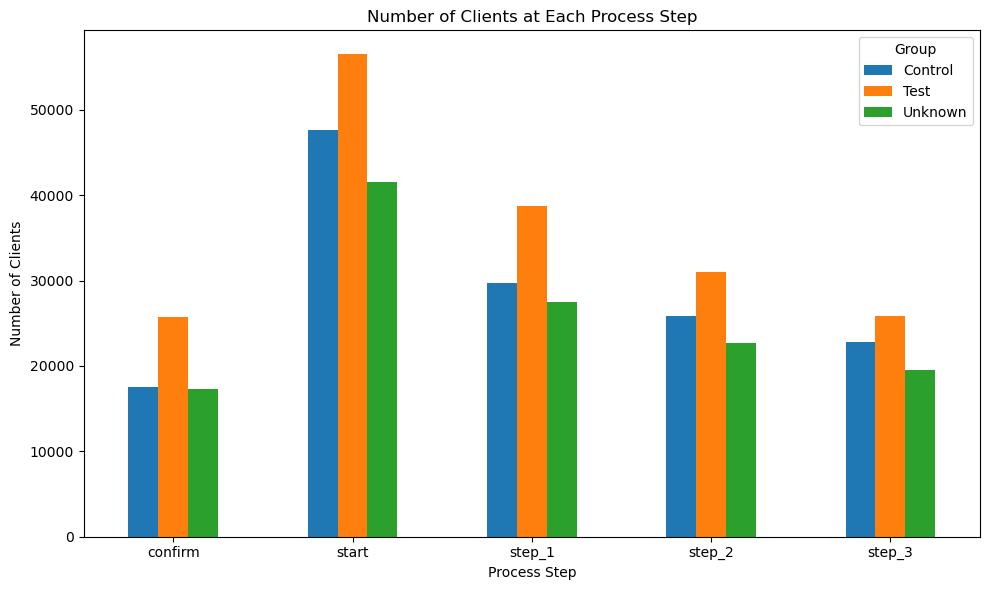

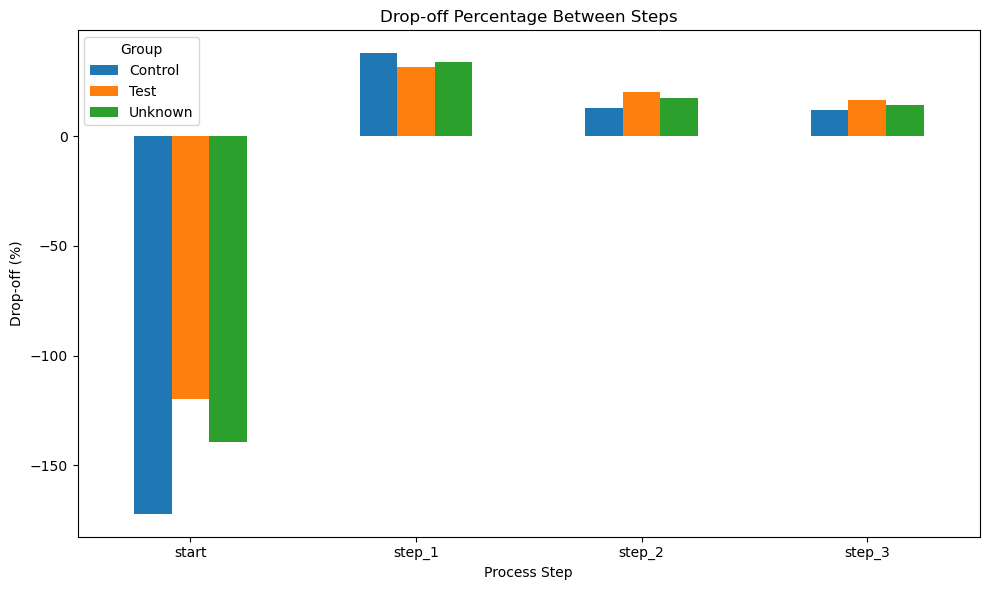

In [34]:
plot_funnel_analysis(df_web_ec)

In [35]:
# Converting date_time to datetime object
df_web_ec['date_time'] = pd.to_datetime(df_web_ec['date_time'])

# Sorting by client, visit and time.
df_web_ec = df_web_ec.sort_values(by=['client_id', 'visit_id', 'date_time'])

In [36]:
# Saving the dataset to a csv file
df_web_ec.to_csv('Datasets/Datasets_clean/df_web_ec.csv', index=False)

In [37]:
df_web_ec

,client_id,visitor_id,visit_id,process_step,date_time,Variation
374121,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,Unknown
374120,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,Unknown
374119,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,Unknown
374118,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,Unknown
374117,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,Unknown
...,...,...,...,...,...,...
359300,9999839,948322592_28990736246,715530422_68620416793_515645,start,2017-03-29 12:11:32,Unknown
359299,9999839,948322592_28990736246,715530422_68620416793_515645,step_1,2017-03-29 12:11:35,Unknown
359298,9999839,948322592_28990736246,715530422_68620416793_515645,step_2,2017-03-29 12:11:50,Unknown
359297,9999839,948322592_28990736246,715530422_68620416793_515645,step_3,2017-03-29 12:12:28,Unknown


In [39]:
print(df_web_ec.shape) # number of rows and columns
print(df_web_ec.head()) # first 5 rows
print(df_web_ec.isnull().sum()) # number of missing values in each column

(449831, 6)
        client_id             visitor_id                      visit_id  \
374121        169  201385055_71273495308  749567106_99161211863_557568   
374120        169  201385055_71273495308  749567106_99161211863_557568   
374119        169  201385055_71273495308  749567106_99161211863_557568   
374118        169  201385055_71273495308  749567106_99161211863_557568   
374117        169  201385055_71273495308  749567106_99161211863_557568   

       process_step           date_time Variation  
374121        start 2017-04-12 20:19:36   Unknown  
374120       step_1 2017-04-12 20:19:45   Unknown  
374119       step_2 2017-04-12 20:20:31   Unknown  
374118       step_3 2017-04-12 20:22:05   Unknown  
374117      confirm 2017-04-12 20:23:09   Unknown  
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
Variation       0
dtype: int64


In [48]:
print(df_web_ec.columns.tolist())

['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time', 'Variation']


In [49]:
# Checking for duplicates
duplicates = df_web_ec[df_web_ec.duplicated()]
print("Total duplicated rows:", len(duplicates))

Total duplicated rows: 5934


In [78]:
def remove_duplicates(df):
    '''REMOVING DUPLICATES, 'start' and 'confirm' steps, only keeping the last each visit'''

    df = df_web_ec.copy()

    df_not_started = df[df['process_step'] != 'start']
    filter_start = df[df['process_step'] == 'start'].drop_duplicates(subset=['visit_id'], keep='last')
    df = pd.concat([df_not_started, filter_start])
    df = df.sort_values(by=['client_id', 'visit_id', 'date_time'])

    not_confirm_df = df[df['process_step'] != 'confirm']
    filter_confirm = df[df['process_step'] == 'confirm'].drop_duplicates(subset=['visit_id'], keep='last')

    df = pd.concat([not_confirm_df, filter_confirm])
    df = df.sort_values(by=['client_id', 'visit_id', 'date_time'])
    return(df)

In [79]:
df_web_ec_cleaned = remove_duplicates(df_web_ec)
df_web_ec_cleaned

,client_id,visitor_id,visit_id,process_step,date_time,Variation
374121,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,Unknown
374120,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,Unknown
374119,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,Unknown
374118,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,Unknown
374117,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,Unknown
...,...,...,...,...,...,...
359300,9999839,948322592_28990736246,715530422_68620416793_515645,start,2017-03-29 12:11:32,Unknown
359299,9999839,948322592_28990736246,715530422_68620416793_515645,step_1,2017-03-29 12:11:35,Unknown
359298,9999839,948322592_28990736246,715530422_68620416793_515645,step_2,2017-03-29 12:11:50,Unknown
359297,9999839,948322592_28990736246,715530422_68620416793_515645,step_3,2017-03-29 12:12:28,Unknown


In [80]:
# Reviewing the df for duplicates
duplicates2 = df[df.duplicated()]
print("Total duplicated rows:", len(duplicates))

Total duplicated rows: 5934


In [83]:
# Saving the dataset to a csv file
df_web_ec_cleaned.to_csv('Datasets/Datasets_clean/df_web_ec_cleaned.csv', index=False)

Checking df_demo dataset

In [69]:
df_demo.info()
df_demo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [ ]:
#Who are the primary clients using this online process?

# Filter for rows where process_step is 'start'
df_start = df_web_ec_cleaned[df_web_ec_cleaned['process_step'].str.lower() == 'start']

# Sort the result by date_time in ascending order
df_sorted = df_start.sort_values(by='date_time', ascending=True)

# Display only client_id and date_time (optional: include more columns if needed)
result = df_sorted[['client_id', 'date_time']]

print(result)

        client_id           date_time
46460     7179755 2017-03-15 00:19:28
104052    4192640 2017-03-15 00:44:38
137482    6752370 2017-03-15 05:43:13
274114    9584408 2017-03-15 06:14:28
228151    2685910 2017-03-15 07:13:47
...           ...                 ...
343771    6506786 2017-06-20 23:28:30
324228    6868690 2017-06-20 23:32:41
337003    2142847 2017-06-20 23:35:24
432569    8295888 2017-06-20 23:43:06
195002    6187864 2017-06-20 23:56:17

[89374 rows x 2 columns]


In [82]:
# Save to CSV
result.to_csv('Datasets/Datasets_clean/clients_started_process.csv', index=False)

In [86]:
#Are the primary clients younger or older, new or long-standing?

# Merge df start with df demo dataset on 'client_id'
df_merged = pd.merge(df_start, df_demo[['client_id', 'clnt_tenure_mnth', 'clnt_age']], on='client_id', how='left')

# Save the final DataFrame
df_merged.to_csv('Datasets/Datasets_clean/clients_started_process_enriched.csv', index=False)

In [87]:
df_merged.head() # reviewing dataset

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_mnth,clnt_age
0,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,Unknown,262.0,47.5
1,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,46.0,29.5
2,647,66758770_53988066587,40369564_40101682850_311847,start,2017-04-12 15:41:28,Test,151.0,57.5
3,722,919259913_64837298108,984487154_55831795985_521110,start,2017-04-19 14:56:16,Unknown,143.0,59.5
4,934,810392784_45004760546,7076463_57954418406_971348,start,2017-04-18 02:38:52,Test,109.0,51.0


In [ ]:
# Sheryll: Note for Ngoc: I understand that you want to save a merged file as a CSV file, however you save and load it again and assigned it to another name/variable. This can be a bit confusing. I will come back to it later :)!

# Load the enriched DataFrame
df_enriched = pd.read_csv('Datasets/Datasets_clean/clients_started_process_enriched.csv')

# Sort by 'clnt_tenure_mnth' in descending order
df_sorted = df_enriched.sort_values(by='clnt_tenure_mnth', ascending=False)

# Save the sorted DataFrame
df_sorted.to_csv('Datasets/Datasets_clean/clients_started_process_enriched_sorted.csv', index=False)

In [90]:
df_sorted.head()

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_mnth,clnt_age
3192,357409,826509458_28745073474,399749366_24763006111_647108,start,2017-04-05 01:06:00,Unknown,749.0,51.0
42963,4833584,664817497_89915440017,288111029_49848759959_718269,start,2017-06-05 14:15:29,Test,669.0,45.0
68205,7616896,59764065_46466538481,524249479_47219925263_798009,start,2017-04-28 13:53:35,Test,669.0,78.0
28937,3271450,155061895_88062610431,405144771_60698974668_622801,start,2017-04-11 00:35:38,Control,669.0,48.5
20865,2354035,981506095_92400037513,240777018_82431663855_682209,start,2017-04-21 12:14:03,Control,668.0,72.0


# Questions

**Hypothesis Testing**
- Completion Rate: The proportion of users who reach the final ‘confirm’ step.
- Time Spent on Each Step: The average duration users spend on each step.
- Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.
- Based on the chosen KPIs, how does the new design’s performance compare to the old one?

- You are required to carry out another analysis, ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold.
- You might want to test whether the average age of clients engaging with the new process is the same as those engaging with the old process
- You might want to test if the average client tenure (how long they’ve been with Vanguard) of those engaging with the new process is the same as those engaging with the old process
- You might want to test if there are gender differences that affect engaging with the new or old process

**Design Effectiveness**
- Was the experiment well-structured?
- Were clients randomly and equally divided between the old and new designs?
- Were there any biases?

**Duration Assessment**
- Was the timeframe of the experiment (from 3/15/2017 to 6/20/2017) adequate to gather meaningful data and insights?

**Additional Data Needs**
- What other data, if available, could enhance the analysis?

**Bonus: Additional Tasks (Optional)**

Client Behavior Analysis
Interaction Patterns:
- How do clients navigate through the old versus the new digital process? Do they follow similar steps or diverge at certain points?
- Consider another hypothesis. Investigate if there’s a difference in the number of actions (steps) taken by users between the Test and Control groups.

Power and Effect Size
- Calculate the effect size and post-hoc power for the first test: the new design (Test group) had a higher completion rate compared to the old design (Control group), the hypothesis test checked if this difference was statistically significant.
- Let’s assume we are in the phase of designing the experiment for the same hypothesis test. Do Power Analysis to calculate the minimum sample size for an experiment.

Streamlit
- Add Streamlit to your project to achieve Customization and Real-time Analysis.
